In [1]:
import os
if 'honorifics_used.csv' in os.listdir('files/'):
    os.remove('files/honorifics_used.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
train = pd.read_csv('files/train.csv')


## I know from experience that the Embarked column has some NaN values in it..

In [5]:
set(train['Embarked'])

{'C', 'Q', 'S', nan}

In [6]:
from data_preprocessing.handle_nan_embarked import handle_nan_embarked

train = handle_nan_embarked(train)

Found nan for embarked. Most common embarkation point for passenger with sex  female and pclass  1 is  S
Found nan for embarked. Most common embarkation point for passenger with sex  female and pclass  1 is  S


In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The PassengerId is directly related to the index..

In [8]:
all(train.index == train.PassengerId - 1)

True

# Looking at the data...

## Any other missing values?

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

## Age has missing values. Let's look at it. 

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

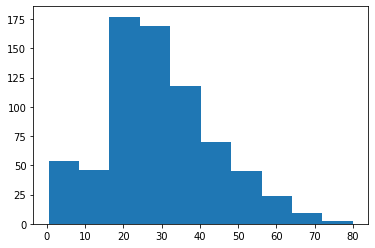

In [11]:
plt.hist(train['Age'])

## The data here is vaguely Gaussian. Could naively try populating the missing age values with a normal distribution centered around the non-NaN mean, but I need to see if the data is missing randomly or not first.

In [12]:
med = np.nanmedian(train['Age'])
mean = np.nanmean(train['Age'])

In [13]:
nans = train[train.Age.isna()]
nans

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## I see a lot of Pclass = 3. Is the data missing at random?

(array([ 30.,   0.,   0.,   0.,   0.,  11.,   0.,   0.,   0., 136.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

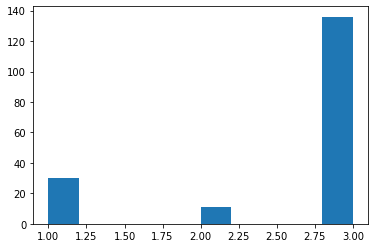

In [14]:
plt.hist(nans['Pclass'])

## It seems the data isn't missing at random, and instead the vast majority of missing ages belong to people with ticket class 3. Since the data isn't missing at random, I'll need to very careful about imputing the missing data.

Looking at the titles of the person, the ticket class, the sex, etc, and using the medians/means of all of these to try and ascertain the age.

# Let's look at the data a little bit more.

In [15]:
train['Died'] = 1 - train['Survived']

In [16]:
for cols in train.columns:
    print('There are ', len(set(train[cols])), 'unique values for column ', cols)

There are  891 unique values for column  PassengerId
There are  2 unique values for column  Survived
There are  3 unique values for column  Pclass
There are  891 unique values for column  Name
There are  2 unique values for column  Sex
There are  265 unique values for column  Age
There are  7 unique values for column  SibSp
There are  7 unique values for column  Parch
There are  681 unique values for column  Ticket
There are  248 unique values for column  Fare
There are  148 unique values for column  Cabin
There are  3 unique values for column  Embarked
There are  2 unique values for column  Died


## I'm going to create a column called "Class" that groups passengers up by their price they've paid for a ticket, in an attempt to calibrate the relative wealth of a passenger

In [17]:
from data_preprocessing.assign_classes import assign_classes
train = assign_classes(train)

Text(0.5, 0, 'Wealth group')

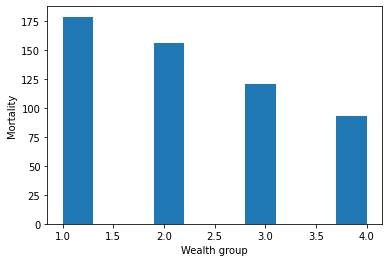

In [18]:
plt.hist(train[train['Survived'] == 0]['Class'], 
         stacked=True)
plt.ylabel('Mortality')
plt.xlabel('Wealth group')

## Clearly, richer people died less frequently.

# Let's look at the columns without too many unique values, which are likely to be categorical, and their relationship with mortality

0 0 Pclass
0 1 Sex
0 2 SibSp
1 0 Parch
1 1 Embarked
1 2 Fare


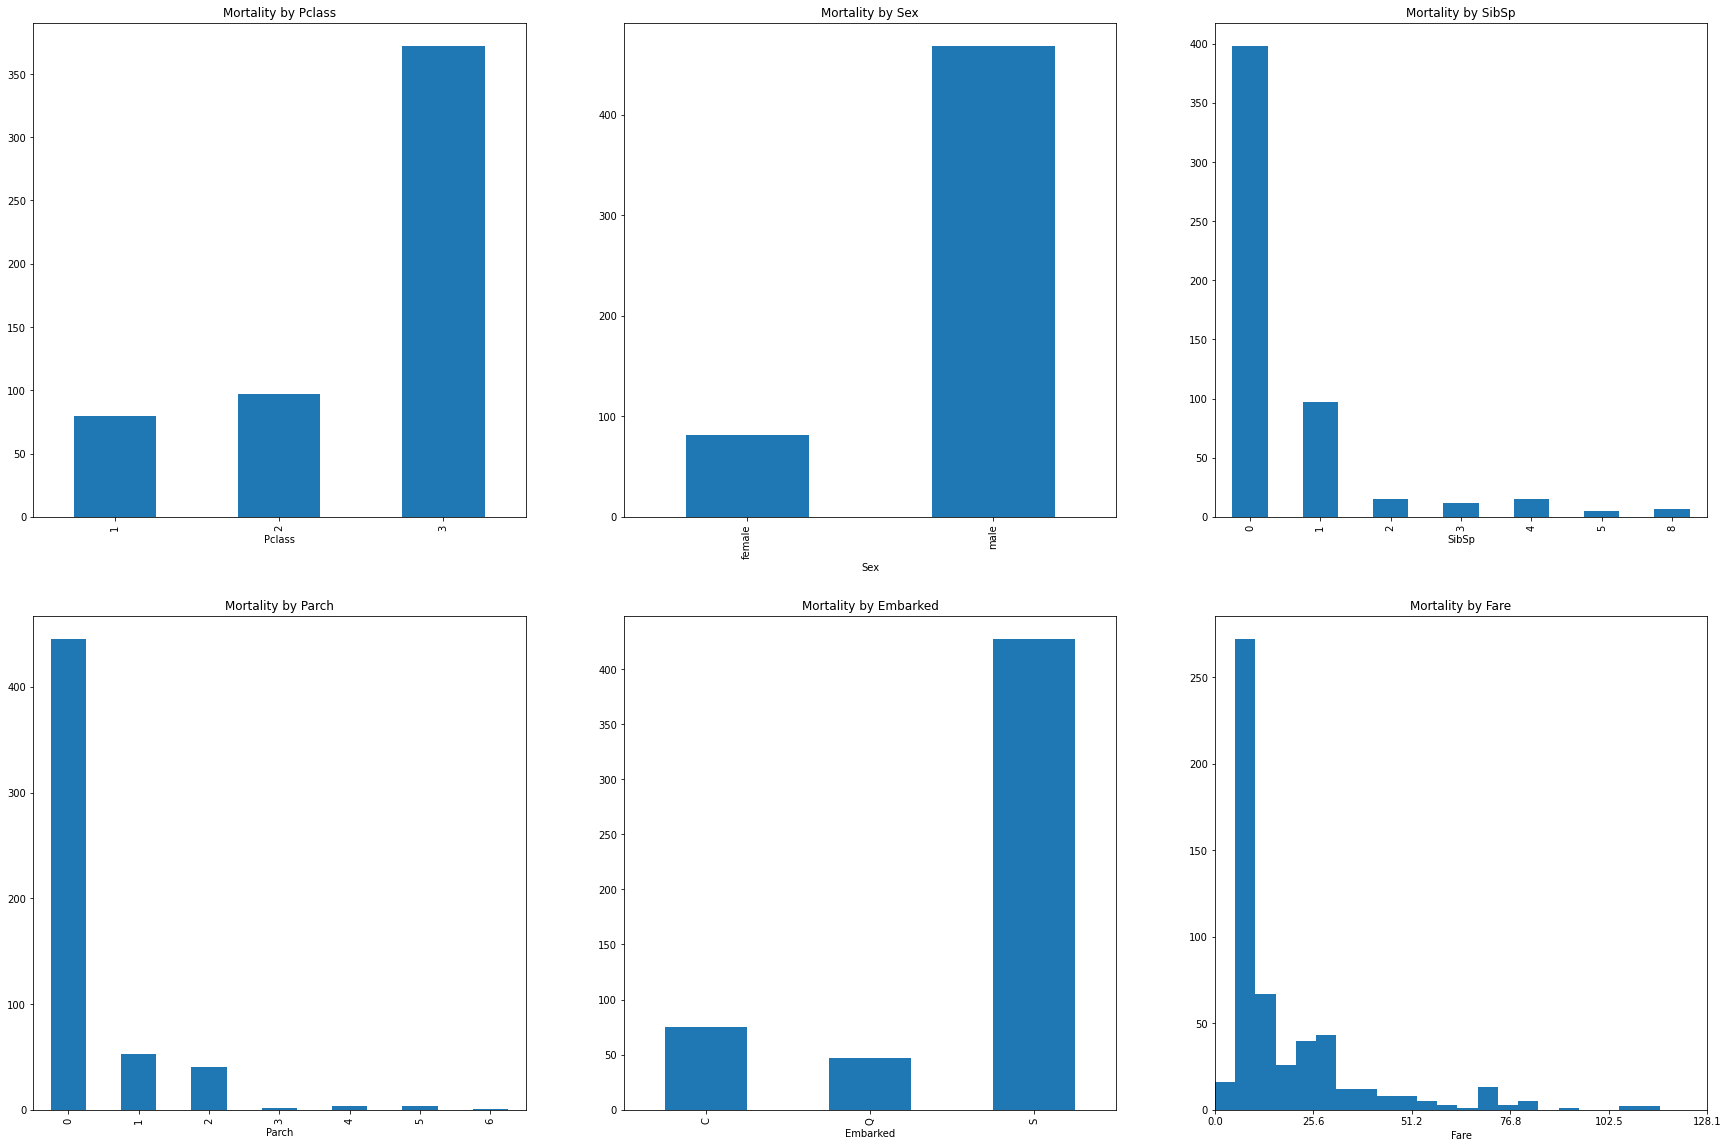

In [19]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize=(30, 20))
for fig, i,col in zip([0,0,0,1,1,1],[0,1,2,0,1,2],['Pclass','Sex','SibSp','Parch','Embarked','Fare']):
    print(fig,i,col)
    if col == 'Fare':
        max_fare = np.max(train['Fare'])
        plt.hist(train[train['Survived'] == 0]['Fare'], 
         stacked=True,
         bins = 50)
        plt.xticks([0, 0.05*max_fare, 0.1*max_fare, 0.15*max_fare, 0.2*max_fare, 0.25*max_fare])
        plt.title('Mortality by '+col)
        plt.xlim([0,0.25*max_fare])
        plt.xlabel('Fare')
        plt.show()


    train.groupby(col).sum()['Died'].plot(kind = 'bar', ax = axs[fig][i])
    axs[fig][i].set_title('Mortality by '+col)

    i += 1

## Looking at the plots..
- Clearly ticket class 3 had the most deaths.
- Males died far more often than females.
- People with no siblings or spouses on board were most likely to die. 
- People with no parents or children aboard were most likely to die.
- People who had Southamptom as a port of embarkation were most likely to die.
- People who had a lower ticket fare were more likely to die (I'm not displaying the whole range of the Fare histogram but the whole range keeps this relationship, and my graph on wealth group already confirms this anyway)

In [20]:
train['Family members'] = train['Parch'] + train['SibSp']

<AxesSubplot:xlabel='Family members'>

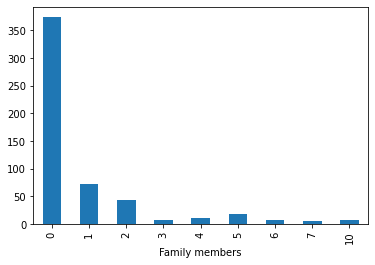

In [21]:
train.groupby('Family members').sum()['Died'].plot(kind = 'bar')

## So, generally speaking, having family members on board seemed to greatly increase a passenger's chance of survival.

# Now, let's work on cleaning the data up, row-by-row.
- Just by looking at its values, Pclass and Embarked should be one-hot encoded.
- It may be worth looking at the titles of passengers, as they're given, and seeing if they could be useful. 
- Not too sure if Ticket and Cabin are usable.

# Processing names
## I found a list of honorifics online. I made some functions to clean the names up and test to see if I'm missing any. Any functions I have can be found in the `data_preprocessing` folder.

In [22]:
from data_preprocessing.process_names import append_honorifics

## However, this function needs to use the combined test and train data to get the correct number of honorifics to look for. So, I'm first going to run this once with the full dataset to generate my `honorifics_used.csv` file, and then run it again as usual on the train data. I look at the wealth group of a passenger to try and give it an honorific if it's NaN, so I'll need to assign wealth groups too.

In [23]:
original_train = pd.read_csv('files/train.csv')
original_test = pd.read_csv('files/test.csv')
combined = pd.concat([original_train, original_test])
combined = combined.reset_index(drop = True)
combined = assign_classes(combined)

append_honorifics(combined)

Need to make new honorifics file...
Giving name  Peuchen Major Arthur Godfrey title of  Mr
Giving name  Butt Major Archibald Willingham title of  Mr
Giving name  Reuchlin Jonkheer John George title of  Mr
Giving name  Oliva y Ocana Dona Fermina title of  Mrs


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Rev,Dr,Mme,Ms,Lady,Sir,Mlle,Col,Capt,Countess
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0.0,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1305,1306,0.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1307,1308,0.0,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now that the file is generated, I'll reapply it on the train dataset.

In [24]:
train = append_honorifics(train)

Found honorifics file
Giving name  Peuchen Major Arthur Godfrey title of  Mr
Giving name  Butt Major Archibald Willingham title of  Mr
Giving name  Reuchlin Jonkheer John George title of  Mr


In [25]:
train = train.drop(columns = ['Died', 'Family members'])

# Dealing with missing ages

## My way with dealing with the nan ages was as follows:

- I needed to treat the missing values with care, because they didn't seem to be missing randomly -- most of the ones missing had a ticket class of 3, for example
- Therefore, take identifying passenger information (gender, ticket class and title), and take a subset of the dataset with passengers who also share those attributes
- Take the mean or median age of that population. The choice of the mean or median will come down to using the mean if the distribution passes a normality test with alpha = 1e-3, and the median otherwise. If there are too few samples with which to take a normality test for the population, see how close the mean and median are. If they're close, within 10% of eachother, just take the mean. If not, take the median since that usually implies the histogram is skewed.

In [26]:
from data_preprocessing.fill_in_ages import fill_in_nan_ages

train = fill_in_nan_ages(train)

## And to check that we have no more missing age values..

In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Class,Col,Don,...,Capt,Sir,Mme,Lady,Rev,Mr,Ms,Mrs,Miss,Master
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208,2.497194,0.002245,0.001122,...,0.001122,0.001122,0.001122,0.001122,0.006734,0.581369,0.001122,0.144781,0.204265,0.044893
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429,1.118156,0.047351,0.033501,...,0.033501,0.033501,0.033501,0.033501,0.081830,0.493612,0.033501,0.352078,0.403390,0.207186
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400,1.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dealing with Ticket and Cabin

In [28]:
train.Cabin.isna().sum()

0

Ticket and Cabin are very unwieldy columns. There are some resources online saying Ticket has meaning, but I'd then have to think about how I'd deal with the data -- it couldn't be considered categorical. I'm going to elect to discard it.

Cabin, meanwhile, has most of its values a NaN, so I'm going to drop it, as I couldn't really justify filling those NaNs with something. I'm also going to drop Died, because I'm not using it anymore. I'm also going to drop PassengerId because it's redundant.

In [29]:
targets = train['Survived'].values

In [30]:
train = train.drop(columns = ['Ticket','Cabin', 'PassengerId', 'Name','title','Fare','Survived'])

## Now to one-hot encode the obvious columns: Sex, Pclass and Embarked. Also going to one-hot encode the wealth groups.

In [31]:
train=pd.get_dummies(train, columns = ['Sex', 'Pclass','Embarked', 'Class'])

## Here's how the data looks now.

In [32]:
train

,Age,SibSp,Parch,Col,Don,Mlle,Countess,Dr,Capt,Sir,...,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Class_4
0,22.0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,38.0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,26.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,35.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,35.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
887,19.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
888,0.0,1,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
889,26.0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [33]:
train.isnull().sum().sum()

0

## I'm going to use a random forest classifier, so I will elect to not scale the Age, SibSp, and Parch columns. Before I do that, however, I'm going to compile all the data cleaning I did into a pipeline function so I can do it to the test data.

In [34]:
from data_preprocessing.assign_classes import assign_classes
from data_preprocessing.process_names import append_honorifics
from data_preprocessing.fill_in_ages import fill_in_nan_ages
from data_preprocessing.handle_nan_embarked import handle_nan_embarked


def prepare_data(file):
    df = pd.read_csv(file)
    df = handle_nan_embarked(df)
    df = assign_classes(df) 
    df = append_honorifics(df)  
    df = fill_in_nan_ages(df)
    passenger_id = df['PassengerId'].values
    df = df.drop(columns = ['Ticket','Cabin', 'PassengerId', 'Name','title','Fare'])
    if 'Survived' in df.columns:
        df = df.drop(columns = ['Survived'])
    df=pd.get_dummies(df, columns = ['Sex', 'Pclass','Embarked', 'Class'])
    return df, passenger_id                                                                                                                                                                                       

And just to make sure that this function works properly..

In [35]:
to_test = prepare_data('files/train.csv')[0]

Found nan for embarked. Most common embarkation point for passenger with sex  female and pclass  1 is  S
Found nan for embarked. Most common embarkation point for passenger with sex  female and pclass  1 is  S
Found honorifics file
Giving name  Peuchen Major Arthur Godfrey title of  Mr
Giving name  Butt Major Archibald Willingham title of  Mr
Giving name  Reuchlin Jonkheer John George title of  Mr


In [36]:
to_test.equals(train)

True

# Now for the classifier... I'm going to do a gridsearch for the best hyperparameters for my RFC.

In [37]:
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

random= {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
}
                


#random = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}



In [38]:
rfc = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc, scoring = 'accuracy', param_distributions = random, n_iter = 1000, cv = StratifiedKFold(n_splits=5))
rf_random.fit(train, targets)
print('Best score: {}'.format(rf_random.best_score_))
print('Best parameters: {}'.format(rf_random.best_params_))

Best score: 0.831648986253217
Best parameters: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': False}


In [39]:
params = rf_random.best_params_
model = RandomForestClassifier(**params)

model.fit(train, targets)

RandomForestClassifier(bootstrap=False, max_depth=6, max_features='log2',
                       min_samples_split=10, n_estimators=10)

In [40]:
test, passenger_id = prepare_data('files/test.csv')

Found honorifics file
Giving name  Oliva y Ocana Dona Fermina title of  Mrs


In [41]:
output = model.predict(test).astype(int)

# Finally, I just need to write my results to a CSV.

In [42]:
import csv
with open('submission.csv', 'w') as myfile:
    wr = csv.writer(myfile, delimiter = ',')
    wr.writerow(['PassengerId','Survived'])
    for pass_id, score in zip(passenger_id, output):
        wr.writerow([pass_id, score])